In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
df = pd.read_csv('ign.csv')

Taking only the relevant columns(socre_phrase, title, platform, score, genre, editors_choice, release_year, release_month, release_day )

In [3]:
df = df[[1,2,4,5,6,7,8,9,10]]

Let's see how the gaming industry has progessed with the number of titles released from 1970 to 2016. 
Strangely, A sharp fall since 2009! Quite opposite to what I assumed in the beginning. 

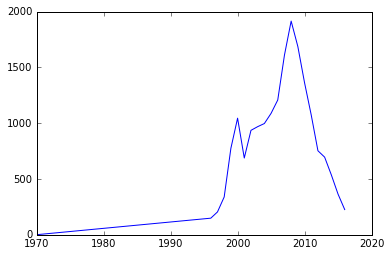

In [4]:
d = dict(df.groupby(['release_year']).size())
plt.plot(d.keys(),d.values())

Converting string 'Y' to 1 and 'N' to 0. Since our target variable is editors_choice, Let's just focus on how it depends on other attributes.

In [5]:
df.editors_choice = df['editors_choice'].apply(lambda x: 1 if x=='Y' else 0)

Almost 1:5 ratio of the binary target classes. This is averagely skewed. 

In [6]:
print df[df.editors_choice==1].shape[0]
print df[df.editors_choice==0].shape[0]

3517
15108


Data is heavily skewed, with some platforms having no editor's chosen game.

In [7]:
df.groupby(['platform'])['editors_choice'].aggregate(np.sum).sort_values()[::-1]

platform
PC                      679
Xbox 360                366
PlayStation 3           342
PlayStation 2           314
Wireless                268
Xbox                    212
Wii                     179
iPhone                  152
PlayStation             124
GameCube                110
Nintendo DS             100
Game Boy Advance         99
PlayStation Portable     77
PlayStation 4            62
Dreamcast                59
Nintendo 3DS             43
Xbox One                 43
Nintendo 64              42
Macintosh                40
PlayStation Vita         35
Game Boy Color           32
iPad                     30
Wii U                    24
Nintendo DSi             23
Super NES                 9
NES                       9
N-Gage                    8
Genesis                   5
NeoGeo Pocket Color       4
Android                   4
Linux                     3
Master System             3
iPod                      3
Saturn                    2
Game Boy                  2
TurboGrafx-

A game with score of 8 and above has a high chance of being recommended by the editor, since the mean is a little less than 9  and the standard deviation being 0.41.
But, we also have a few games (less than 1% of the games not recommended by the editor) getting high score but they are not recommended. 
Therefore, we can safely deduce that a game with high score is likely to be editor's recommendation.

In [8]:
print df[df.editors_choice==1][['score']].mean() 
print df[df.editors_choice==1][['score']].min()
print df[df.editors_choice==1][['score']].std()
print df[df.editors_choice==0][['score']].mean() 
print df[df.editors_choice==0][['score']].max()
print (float(df[df.editors_choice==0][df.score >= 9.0].shape[0])/df[df.editors_choice==0].shape[0])*100

score    8.868581
dtype: float64
score    8.0
dtype: float64
score    0.416654
dtype: float64
score    6.503938
dtype: float64
score    10.0
dtype: float64
0.820757214721


C:\Users\Aman\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Let's see if the editors are genre biased or not.
Top 15 genres from both the editor's recommended games and otherwise show that indeed the editors have an equal interest in all the genres, thus, genre wouldn't be helpful to us when we predict editor's choice.
Also, since genre is a sparse attribure, we can simply drop it(Doesn't contribute to editor's choice).

In [9]:
print df[df.editors_choice==1].genre.value_counts()[:15]
print df[df.editors_choice==0].genre.value_counts()[:15]

Action               483
Sports               426
Shooter              363
RPG                  295
Racing               231
Strategy             221
Action, Adventure    204
Platformer           199
Adventure            183
Puzzle               146
Fighting             114
Action, RPG           98
Simulation            83
Music                 74
Puzzle, Action        42
Name: genre, dtype: int64
Action               3314
Sports               1490
Shooter              1247
Racing                997
Adventure             992
Strategy              850
RPG                   685
Puzzle                630
Platformer            624
Action, Adventure     561
Simulation            484
Fighting              433
Music                 297
Action, RPG           232
Racing, Action        182
Name: genre, dtype: int64


The following figure shows the relation between number of editor recommended games and the platform; PC has the obvious lead. Following PC we've PS2, PS3 and XBox360, these values suggest that a game for a particular platform could have some information about whether it'll be a recommended game or not.

In [10]:
%matplotlib qt
#Change the above to %matplotlib inline to see the plot on this notebook.
d = dict(df.groupby(['platform'])['editors_choice'].aggregate(np.sum).sort_values())
xaxis = np.arange(len(d.keys()))
plt.bar(xaxis,d.values())
plt.xticks(xaxis, d.keys(),rotation=90)
plt.show()

Following plot shows how many editor recommended games were published in the year from 1970 to 2016. A look at period from 2009 to 2014 tells that the game industry made many great games, probably due to the surge in console gaming with xbox360 (released in 2010) and ps3 (in 2012). 

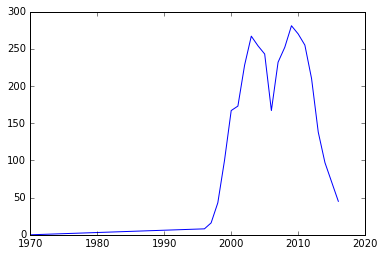

In [11]:
%matplotlib inline
d = dict(df.groupby(['release_year'])['editors_choice'].aggregate(np.sum))
plt.plot(d.keys(),d.values())

Lastly, A strange finding from release_month versus number of editor recommended games, tells that November happens to be a good time to release great games.
My intuition says they are probably targetting the holiday season sales, With Christmas around, every gamer will buy a $45 (originally priced $60) AAA game, specially if it's editor's recommendation.
A lot of pre-release advertisements, along with great scores by the IGN editors

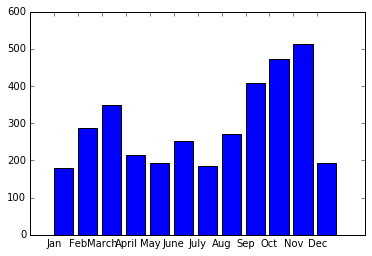

In [12]:
d = dict(df.groupby(['release_month'])['editors_choice'].aggregate(np.sum))
xaxis = d.keys()
plt.bar(xaxis, d.values())
plt.xticks(xaxis,['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.show()